## 목차 ##
0. Basic Setup
1. 데이터 시각화 Quest
    이진변수 
    3변수 이상 
2. T-test Quest
3. EDA Quest

# Basic Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys

#경고창이 뜨지 않도록 해주는 것
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

주피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함

In [2]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 1. 데이터 시각화 Quest ##
주어진 데이터셋들을 자유롭게 활용하여
시각화 세션에서 배운 그래프 중 2개(이진변수, 3개 이상 변수)를 선택해 데이터를 시각화하고
시각화 결과에서 의미 도출해보기!

In [3]:
#데이터셋 불러오기 및 확인
df = pd.read_csv("./airbnb_listings.csv")
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

## 이진변수

In [5]:
import math     #로그 함수 사용을 위해 math 임포트

#침대 종류와 침대 수의 관계를 알고 싶다. 필요한 column만 추출
df_bed = df[['bed_type','beds']]
df_bed = df_bed.dropna(axis=0) 
df_bed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 0 to 3584
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bed_type  3576 non-null   object 
 1   beds      3576 non-null   float64
dtypes: float64(1), object(1)
memory usage: 83.8+ KB


In [6]:
#침대 종류 당 침대 수 확인
print(df_bed.groupby(['bed_type'])['beds'].count())

#침대 종류 당 침대 수가 편차가 크므로 상용로그 적용     bed_count_log10
bed_count_log10 = df_bed.groupby(['bed_type'])['beds'].count().apply(math.log10).to_frame().reset_index() 
print('\n', 'bed_count_log10\n', bed_count_log10, sep='')

#침대 종류 당 방내 평균 침대 수     bed_mean
bed_mean = df_bed.groupby(['bed_type'])['beds'].mean().to_frame().reset_index() 
print('\n', 'bed_mean\n', bed_mean, sep='')

#침대 종류 당 침대 수 표준편차      bed_std 
bed_std = df_bed.groupby(['bed_type'])['beds'].std().to_frame().reset_index()
print('\n','bed_std\n', bed_std, sep='') 

bed_type
Airbed             40
Couch              10
Futon              51
Pull-out Sofa      31
Real Bed         3444
Name: beds, dtype: int64

bed_count_log10
        bed_type      beds
0         Airbed  1.602060
1          Couch  1.000000
2          Futon  1.707570
3  Pull-out Sofa  1.491362
4       Real Bed  3.537063

bed_mean
        bed_type      beds
0         Airbed  1.100000
1          Couch  1.200000
2          Futon  1.156863
3  Pull-out Sofa  1.096774
4       Real Bed  1.627468

bed_std
        bed_type      beds
0         Airbed  0.378932
1          Couch  0.421637
2          Futon  0.418213
3  Pull-out Sofa  0.396219
4       Real Bed  1.023545


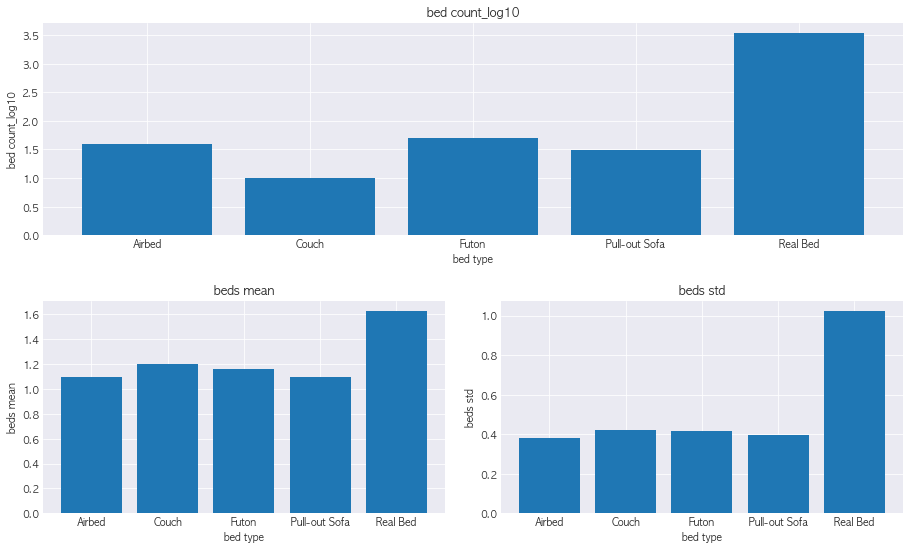

In [7]:
#막대 그래프 작성
plt.figure(figsize=(13,8))  #그래프 사이즈 지정

#침대 종류 당 개수(로그) 막대그래프
plt.subplot(2,1,1)
plt.title('bed count_log10')   
plt.xlabel('bed type')
plt.ylabel('bed count_log10')
plt.bar(bed_count_log10.bed_type,bed_count_log10.beds )

#침대 종류 당 방내 개수 평균 막대그래프
plt.subplot(2,2,3)
plt.title('beds mean')
plt.xlabel('bed type')
plt.ylabel('beds mean')
plt.bar(bed_mean.bed_type,bed_mean.beds )

#침대 종류 당 방내 개수 표준편차 막대그래프
plt.subplot(2,2,4)
plt.title('beds std')
plt.xlabel('bed type')
plt.ylabel('beds std')
plt.bar(bed_std.bed_type,bed_std.beds )
plt.tight_layout(pad=2.0)

## 결론 ##
침대 종류는 여러가지가 있으나, 일반 침대(Real Bed)가 대부분이었다. 
나머지 침대(요, 소파, 에어베드 등)는 아주 적은 수로 있었고, 있다 하더라도 대부분 1개씩 있는 것을 볼 수 있다.
일반 침대(Real Bed)는 개수가 다양하다.

## 삼변수 이상

In [8]:
#instant_bookable이 있는 도시 모으기
df.city = df.city.str.strip() #양쪽 공백으로 같은게 다르게 분류되는 경우 제거
df_t = df.groupby(['city','instant_bookable'])['country'].count().to_frame().reset_index()
instant_cities = list(df_t[df_t['instant_bookable'] == 't'].sort_values(by='country').city)
instant_cities

['Brookline',
 'Charlestown',
 'East Boston',
 'Jamaica Plain, Boston',
 'Roslindale',
 'South Boston',
 'Watertown',
 'West Roxbury',
 'Allston',
 'Brighton',
 'Roxbury Crossing',
 'Jamaica Plain',
 'Cambridge',
 'Dorchester',
 'Somerville',
 'Boston']

In [9]:
#city, instant_bookable, price 세 변수의 관계를 알아보고 싶다.
df_CIP = df[['city','instant_bookable','price']]
df_CIP = df_CIP[df_CIP.city.isin(instant_cities)]
df_CIP = df_CIP.dropna(axis=0) #결측치 제거
df_CIP.info()

#데이터 조작에 필요한 함수
def tf_to_bin(str):
    if str == 'f':
        return 0
    else: return 1

def delcom(str):
    return str.replace(',','')

#instant_bookable을 바이너리 값으로 변환
df_CIP.instant_bookable = df_CIP.instant_bookable.apply(tf_to_bin)

#price를 float type으로 변환
df_CIP.price = df_CIP.price.str[1:].apply(delcom).apply(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3556 entries, 0 to 3584
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              3556 non-null   object
 1   instant_bookable  3556 non-null   object
 2   price             3556 non-null   object
dtypes: object(3)
memory usage: 111.1+ KB


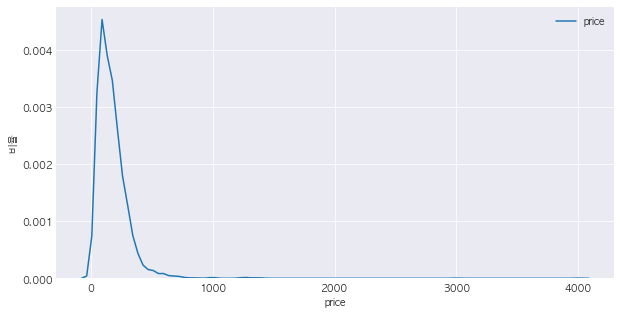

In [10]:
# kdeplot - price outlier 확인
# 빈 캔버스 사이즈 지정
plt.figure(figsize=(10,5))

# 캔버스에 그림 그리기
kde=sns.kdeplot(df_CIP['price']) 
kde.set_xlabel("price")
kde.set_ylabel("비율")

# 결과 캔버스 보여주기
plt.show() 

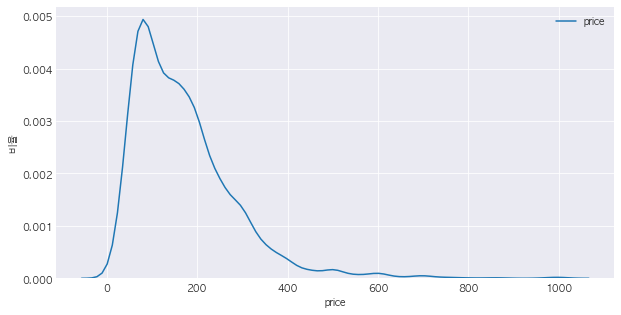

In [11]:
#price에 너무 큰 outlier가 있으니 1000보다 큰 아웃라이어 제거하고 다시 kdeplot확인
df_CIP = df_CIP[df_CIP.price<=1000]
plt.figure(figsize=(10,5))

# 캔버스에 그림 그리기
kde=sns.kdeplot(df_CIP['price']) 
kde.set_xlabel("price")
kde.set_ylabel("비율")

# 결과 캔버스 보여주기
plt.show() 

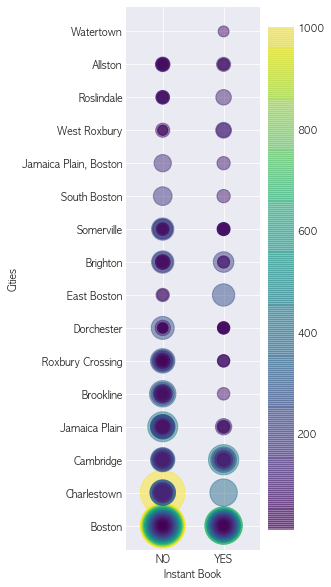

In [12]:
df_CIP = df_CIP.sort_values(by='price', ascending=False)
plt.figure(figsize=(3,10))
plt.xlim(-0.6,1.6)
plt.xticks([0,1],['NO', 'YES'])
plt.scatter(df_CIP['instant_bookable'], # x축
            df_CIP['city'], # y축
            c=df_CIP['price'],
            s=2*df_CIP['price'], # 색이랑 사이즈로 같이 가격 표현
            # 10을 곱한 이유는 그래프 사이즈에 맞게 원의 지름을 키워주기 위함
            alpha=0.5, # 투명도
            cmap='viridis') # 컬러바 종류
plt.colorbar()
plt.ylabel('Cities')
plt.xlabel('Instant Book')
# plt.xticks(rotation=90) # x축에 종류가 많으면 label 돌려주기
plt.show()

## 결론 ##
1. 원의 크기와 색상을 통해 Boston, Cambridge, Charlestown 등의 도시가 다른 도시에 비해 가격이 비싼 것을 확인할 수 있음
2. 반투명한 원들이 모여있으므로, 원의 불투명도를 통해 각 도시들의 에어비앤비 숙소 수를 직관적으로 파악 가능
    -> South Boston, Watertwon, East Boston 등은 숙소 수가 눈에 띄게 적음을 알 수 있음
3. Instant Book이 가능한 것과 가격 수준은 관련이 있어보임. 전반적으로 Instant book이 안되는 곳이 가격이 높아보임
4. 전반적으로 Instant Book이 되는 곳보다 안되는 곳이 많은 것을 확인할 수 있음

# 2. t-test Quest ##
2020.csv, 2019.csv는 각각 2020년, 2019년 나라별 여러 행복 지수에 대한 데이터 이다.
2020년은 'Ladder score'이라는 값이 최종 점수 이고, 이 값으로 내림차순 정렬 되어 있다.
2019년은 'Score'이라는 값이 최종 점수 이고, 이 값으로 내림차순 정렬 되어 있다.

2020년도에서 상위 50% 나라들 중 50개를 랜덤으로 뽑고, 하위 50% 나라들 중 50개를 랜덤으로 뽑아 상위 50% 나라들의 평균 'Freedom to make life choices'가 더 큰지 검정 해주세요.

독립인 두 표본의 평균 차이를 검정하므로 독립 표본 t-test 진행


In [13]:
df20 = pd.read_csv('./2020.csv')
df20.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [14]:
# 필요항 컬럼만 추출
df20 = df20[['Country name', 'Freedom to make life choices']]
# 컬럼 이름 수정
df20.columns = ['country_name', 'free_choices']
df20

,country_name,free_choices
0,Finland,0.949172
1,Denmark,0.951444
2,Switzerland,0.921337
3,Iceland,0.948892
4,Norway,0.955750
...,...,...
148,Central African Republic,0.640881
149,Rwanda,0.900589
150,Zimbabwe,0.711458
151,South Sudan,0.451314


Skewness: -0.695603
Kurtosis: 0.151048


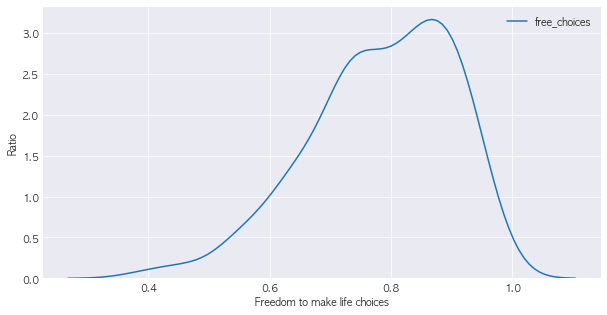

In [15]:
#free_choices의 분포 데이터
fc = df20.free_choices #trip_duration 데이터만 td라고 저장하기
plt.figure(figsize=(10,5))
kdep=sns.kdeplot(fc) 
kdep.set_xlabel("Freedom to make life choices")
kdep.set_ylabel("Ratio")
print("Skewness: %f" % fc.skew()) #Skewness: 왜도, 데이터의 비대칭성 정도를 나타냄. 0에 가까울 수록 정규분포와 비슷
print("Kurtosis: %f" % fc.kurt()) #Kurtosis: 첨도, 데이터 분포의 뽀족한 정도를 나타냄. 0에 가까울 수록 정규 분포와 비슷
plt.show() 

#t검정에 사용 가능해보이네요~!

In [16]:
#50개씩 샘플링

#일단 상위 50% 하위50%로 구분
df20_high_cut = df20[df20['free_choices']>=df20['free_choices'].quantile(0.5)]
df20_low_cut = df20[df20['free_choices']<df20['free_choices'].quantile(0.5)]

#50개씩 추출

group_high = df20_high_cut.sample(n=50, random_state=1).free_choices
group_low = df20_low_cut.sample(n=50, random_state=1).free_choices

## 등분산 검정
H0: group_high와 group_low 간의 분산 차이가 없다

H1: group_high와 group_low 간의 분산 차이가 있다

In [17]:
#등분산검정 패키지
from scipy.stats import levene

print('등분산 검정 P-value=',levene(group_high,group_low)[1])

#p<0.05이므로 분산이 같지 않음 -> 귀무가설 기각, 이분산 독립검정 시행

등분산 검정 P-value= 0.0011469148570882731


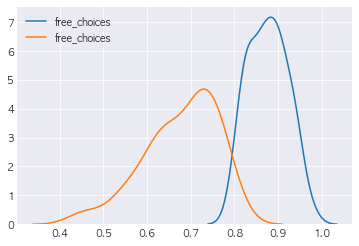

In [18]:
kdep=sns.kdeplot(group_high) 
kdep=sns.kdeplot(group_low) 
#분산이 달라보이긴 하네요...

## 독립표본 t검정
H0: group_high와 group_low 간의 평균 차이가 없다

H1: group_high와 group_low 간의 평균 차이가 있다

In [19]:
from scipy.stats import ttest_ind
print('t-test P-value =',ttest_ind(group_high, group_low, equal_var=False)[1])

t-test P-value = 3.827691559820075e-24


## 결론 
유의수준보다 현저히 적은 유의확률을 보이므로 귀무가설 기각, 두 표본에는 평균차이가 존재한다.

## 추가문제


2019 data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     156 non-null    object 
 1   free_choices_19  156 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB

2020 data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     153 non-null    object 
 1   free_choices_20  153 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB

Ttest_relResult(statistic=-66.912743862387, pvalue=7.960733799509805e-50)


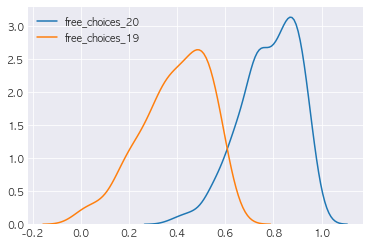

In [20]:
#19년 data 가져오고 필요한 열만 추출, 합치기 편하게 20년 data 열 이름 변경
df19 = pd.read_csv('2019.csv')
df19 = df19[['Country or region', 'Freedom to make life choices']]
df19.columns = ['country_name','free_choices_19']
print('2019 data')
df19.info()
df20.columns = ['country_name','free_choices_20']
print('\n2020 data')
df20.info()

#country name을 index로 설정하고 concatenate
df1920 = pd.concat([df19.set_index('country_name'),df20.set_index('country_name')],axis=1)
df1920 = df1920.dropna()

#50개씩 샘플링
sample_df_1920 = df1920.sample(n=50, random_state=1)
sample_19 = sample_df_1920.free_choices_19
sample_20 = sample_df_1920.free_choices_20

#ttest 대응표본검정 
#H0 = 각 나라의 19년과 20년 Freedom to make life choices가 같다
#H1 = 각 나라의 19년과 20년 Freedom to make life choices가 같지 않다
from scipy.stats import ttest_rel
print('\n', ttest_rel(sample_19,sample_20), sep='')

kdep=sns.kdeplot(df1920.free_choices_20) 
kdep=sns.kdeplot(df1920.free_choices_19) 


# pvalue가 0.05보다 작으므로 차이가 있다고 볼 수 있지만, 
# 두 집단의 각 나라의 값을 보았을 떄 각 년도의 만점 기준이 다른 것으로 보이므로 해당 수치에 통계적 의미가 있다고 해석하기는 어려움

# 3. EDA Quest 
#### 주어진 두 개의 데이터셋을 바탕으로 아래의 질문에 대한 자신만의 해답을 코드와 함께 **간단하게**(약 2-3줄 내외) 적어 제출해주세요!
 
 *   *airbnb.csv*  관련 문제
     1.   'price', 'review_scores_rating', 'latitude'에 대해서 변수의 종류는 무엇이며, 분포는 어떻게 되어있나요? 각 변수의 특징과 함께 서술해주세요!
     2.   위의 데이터에 이상치/결측치가 있나요? 있다면 어떻게 처리해야 할까요?

 *   *summer_product.csv* 관련 문제
    1.    해당 데이터를 제공한 업체에서 새로이 광고를 달기 위해 상품을 Grading 하려고 합니다. 이를 위해 상품별 매출을 구하고 1) IQR을 기준으로 이상치를 제거해 본 후 2) 이러한 방식이 적절한지 설명한 후, 다른 방식이 있다면 제시해주세요!
    2.    임의의 두 컬럼을 정하고(질적 변수 중 하나, 양적 변수 중 하나), 해당 데이터가 매출과 어떤 관계가 있는지 분석해주세요! 
    3.    해당 데이터에서 1) 매출과 rating간의 상관관계와 매출과 2) merchant rating 간의 상관관계를 비교하고 싶을때, 각 변수의 분포를 고려하면 어떤 점에 유의해야 할까요?


## airbnb.csv 관련 문제

In [21]:
#import하고 스킴

df_ab = pd.read_csv("airbnb_listings.csv")
df_ab.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47


In [22]:
df_ab.info()

# 'price':object(string)/결측치 없음, 'review_scores_rating':float64/결측치 있음, 'latitude':float64/결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [23]:
#1번에서 만들어둔 delcom함수 활용하여 price를 float으로 바꿔주가
df_ab.price = df_ab.price.str[1:].apply(delcom).apply(float)

Skewness: 8.521484
Kurtosis: 168.351704


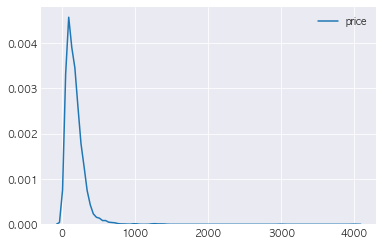

In [24]:
#price 분포 확인
kdep=sns.kdeplot(df_ab.price) 
print("Skewness: %f" % df_ab.price.skew())
print("Kurtosis: %f" % df_ab.price.kurt())
#양의 왜도, outlier가 있으므로 사전에 뺴주는 작업이 필요해 보임

Skewness: -2.671447
Kurtosis: 11.556325


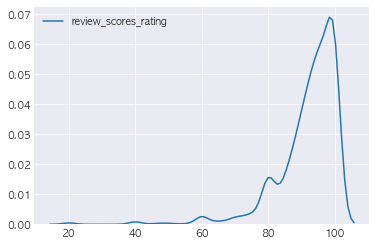

In [25]:
#review_scores_rating 분포 확인
kdep=sns.kdeplot(df_ab.review_scores_rating) 

print("Skewness: %f" % df_ab.review_scores_rating.skew()) 
print("Kurtosis: %f" % df_ab.review_scores_rating.kurt()) 
#음의 왜도를 보임, 모든 값이 극단적이지는 않으므로 outlier를 필터링할 필요는 없어 보임.

Skewness: -2.671447
Kurtosis: 11.556325


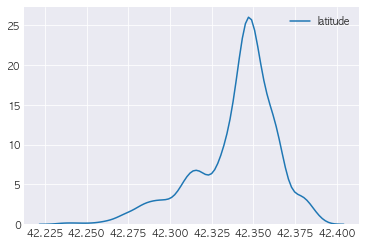

In [26]:
#latitude 분포 확인
kdep=sns.kdeplot(df_ab.latitude) 

print("Skewness: %f" % df_ab.review_scores_rating.skew()) 
print("Kurtosis: %f" % df_ab.review_scores_rating.kurt()) 
#음의 왜도를 보임, 모든 값이 극단적이지는 않으므로 outlier를 필터링할 필요는 없어 보임. 
#넓지 않은 구간에서 나타나므로 미국의 특정 구역을 중심으로 한 데이터라는 것을 알 수 있음

## 결론
### 1. 세 변수에 관하여
'price':object(string)/결측치 없음, 양의 왜도, outlier가 있으므로 사전에 뺴주는 작업이 필요해 보임

'review_scores_rating':float64/결측치 있음, 음의 왜도를 보임, 모든 값이 극단적이지는 않으므로 outlier를 필터링할 필요는 없어 보임.

'latitude':float64/결측치 없음, 음의 왜도를 보임, 모든 값이 극단적이지는 않으므로 outlier를 필터링할 필요는 없어 보임. 
           +넓지 않은 구간에서 나타나므로 미국의 특정 구역을 중심으로 한 데이터라는 것을 알 수 있음
### 2. 이상치, 결측치에 관하여
price의 이상치는 터무니없이 비싼 허위 매물일 가능성이 있음. 통계량을 왜곡시킬 수 있으니 적당한 범위에서 빼는 것이 좋아 보임

review_scores_rating의 결측치(아직 리뷰가 없는 경우)는 양이 상당히 많아서 해당 변수와 상관 없는 경우 평균값으로 채우는 것이 적절하나, 
해당 변수와 직접적으로 관련된 것을 알아보기 위해서는 빼는 것이 좋을 수 있음.


## summer_product.csv 관련 문제
1. 상품별 매출을 구하고 1) IQR을 기준으로 이상치를 제거해 본 후 2) 이러한 방식이 적절한지 설명한 후, 다른 방식이 있다면 제시

In [27]:
df_sp = pd.read_csv('./summer_product.csv')
df_sp.head(3)

,Unnamed: 0,title,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,...,tags,product_color,product_variation_inventory,origin_country,merchant_name,merchant_rating_count,merchant_rating,merchant_id,theme,crawl_month
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,0,...,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,50,CN,zgrdejia,568,4.128521,595097d6a26f6e070cb878d1,summer,2020-08
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.0,22,EUR,20000,1,3.45,6135,0,...,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,50,CN,sarahouse,17752,3.899673,56458aa03a698c35c9050988,summer,2020-08
2,2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,8.0,43,EUR,100,0,3.57,14,0,...,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,1,CN,hxt520,295,3.989831,5d464a1ffdf7bc44ee933c65,summer,2020-08


In [28]:
#데이터 스킴
df_sp.info()

#매출을 구하기 위해 먼저 currency 통일여부 확인
df_sp.groupby(['currency_buyer'])['currency_buyer'].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1573 non-null   int64  
 1   title                        1573 non-null   object 
 2   price                        1573 non-null   float64
 3   retail_price                 1573 non-null   int64  
 4   currency_buyer               1573 non-null   object 
 5   units_sold                   1573 non-null   int64  
 6   uses_ad_boosts               1573 non-null   int64  
 7   rating                       1573 non-null   float64
 8   rating_count                 1573 non-null   int64  
 9   badges_count                 1573 non-null   int64  
 10  badge_local_product          1573 non-null   int64  
 11  badge_product_quality        1573 non-null   int64  
 12  badge_fast_shipping          1573 non-null   int64  
 13  tags              

currency_buyer
EUR    1573
Name: currency_buyer, dtype: int64

Skewness: 4.497177
Kurtosis: 29.207157


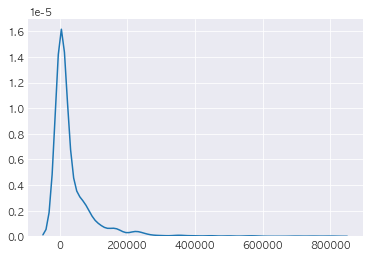

In [29]:
#매출 구하고 분포 확인
sp_revenue = df_sp.price.multiply(df_sp.units_sold)
df_sp['revenue'] = sp_revenue

kdep=sns.kdeplot(sp_revenue) 

print("Skewness: %f" % sp_revenue.skew()) 
print("Kurtosis: %f" % sp_revenue.kurt()) 


#양의 왜도, 300000정도를 기준으로 이상치가 있음

In [30]:
#매출 상위 1퍼센트 데이터 제거
df_sp = df_sp[df_sp.revenue < df_sp.revenue.quantile(0.99)]
df_sp.revenue

0         1600.0
1       160000.0
2          800.0
3        40000.0
4          272.0
          ...   
1568     60000.0
1569       200.0
1570       500.0
1571      1300.0
1572       700.0
Name: revenue, Length: 1554, dtype: float64

Skewness: 2.500102
Kurtosis: 6.691718


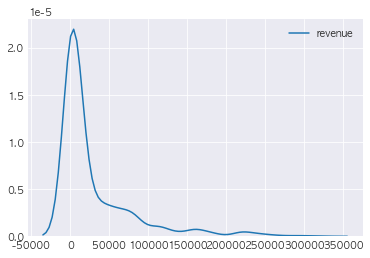

In [31]:
#분포 확인

kdep=sns.kdeplot(df_sp.revenue) 

print("Skewness: %f" % df_sp.revenue.skew()) 
print("Kurtosis: %f" % df_sp.revenue.kurt()) 


#양의 왜도, 매출이 과도하게 높은 이상치는 제거했음

### 결론
이상치가 많지 않은 경우는 해당 값을 정렬한 뒤 필요없는 값만 손수 빼주어도 괜찮을 것 같음. IQR로 정하면 어느정도 값이 적절할지에 대한 감을 잡기 어려운 것 같음.

### 2. 두 변수의 매출과 관계 파악


In [32]:
#origin country와 revenue의 관계를 알고 싶다.

print('count by origin country\n', df_sp.groupby(['origin_country'])['revenue'].count(),sep='')

print('\naverage revenue by origin country\n', df_sp.groupby(['origin_country'])['revenue'].mean(),sep='')

print('\nstandard deviation by origin country\n', df_sp.groupby(['origin_country'])['revenue'].std(),sep='')

#원산지별로 매출 평균은 중국이 미국보다 크다는 것을 알 수 있음(나머지는 수가 적어 무의미하다고 할 수 있음)
#그러나 중국 원산지의 매출은 편차가 크다는 것 또한 알 수 있음

count by origin country
origin_country
AT       1
CN    1498
GB       1
SG       2
US      31
VE       5
Name: revenue, dtype: int64

average revenue by origin country
origin_country
AT      700.000000
CN    30201.115254
GB     9000.000000
SG    28496.500000
US    13949.096774
VE      684.900000
Name: revenue, dtype: float64

standard deviation by origin country
origin_country
AT             NaN
CN    51505.884241
GB             NaN
SG    39744.350850
US    26254.310877
VE      632.361981
Name: revenue, dtype: float64


P-value of Pearson test = 0.06791094454762535


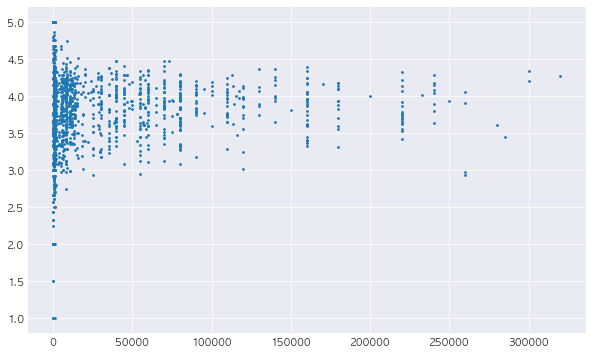

In [33]:
#rating과 revenue의 관계 파악

plt.figure(figsize=(10,6))
plt.scatter(df_sp.revenue,df_sp.rating, s=3)

from scipy.stats import pearsonr

print('P-value of Pearson test =',pearsonr(df_sp.revenue,df_sp.rating)[1])

#pvalue가 0.05 이상이므로 rating과 revenue 간에 선형 상관관계가 있다고 보기 어렵고, 
#산점도 개형 상으로도 특정한 관계가 있어 보이지는 않음.

### 결론
1) 원산지와 매출의 관계
원산지별로 매출 평균은 중국이 미국보다 크다는 것을 알 수 있음(나머지는 수가 적어 무의미하다고 할 수 있음)
그러나 중국 원산지의 매출은 이상치를 제거해도 다른 원산지 품목보다 편차가 크다는 것 또한 알 수 있음

2) rating과 매출 간의 관계
pvalue가 0.05 이상이므로 rating과 revenue 간에 선형 상관관계가 있다고 보기 어렵고, 
산점도 개형 상으로도 특정한 관계가 있어 보이지는 않음.

## 추가문제 3
해당 데이터에서 1) 매출과 rating간의 상관관계와 2) 매출과 merchant rating 간의 상관관계를 비교하고 싶을때, 각 변수의 분포를 고려하면 어떤 점에 유의해야 할까요?

P-value of Pearson test = 2.8798622926703817e-10


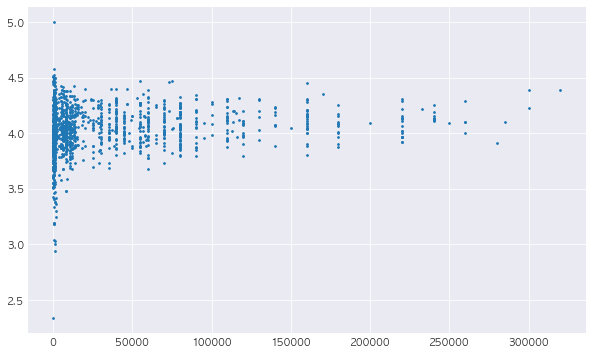

In [34]:
#merchant_rating과 revenue의 관계 파악

plt.figure(figsize=(10,6))
plt.scatter(df_sp.revenue,df_sp.merchant_rating, s=3)

from scipy.stats import pearsonr

print('P-value of Pearson test =',pearsonr(df_sp.revenue,df_sp.merchant_rating)[1])

#pvalue가 0.05 이상이므로 rating과 revenue 간에 선형 상관관계가 있다고 보기 어렵고, 
#산점도 개형 상으로도 특정한 관계가 있어 보이지는 않음.

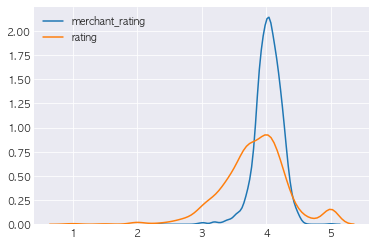

In [35]:
#분포 확인

kdep=sns.kdeplot(df_sp.merchant_rating) 
kdep=sns.kdeplot(df_sp.rating) 

## 결론

merchant_rating은 4점 근처에 크게 몰려있는 것을 확인할 수 있으며, 분산이 훨씬 작기 때문에 rating보다 더 강한 선형성을 보일 수 있다. 

하지만 4점 근처에 모두 모여있다는 뜻은 선형회귀했을 때 상수항수 y=4에 가깝게 나올 가능성이 높기 때문에, 선형성만 강할 뿐 정작 목적함수(revenue)에 필요한 기울기값을 갖기 어렵다는 문제점이 있어 merchant_rating이 rating보다 revenue와의 상관계수 및 선형성 p-value가 유의미하게 다르게 나타나는 것은 단순 표준편차에 의한 것일 뿐 회귀적 의미를 갖는다고 보기는 어렵다.